In [18]:
#Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway
from statsmodels.stats.proportion import proportions_ztest
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression



In [19]:
#Leer dataframe y seleccionar primeros 10 mil entradas
df = pd.read_csv('GRD_2023_muestra_diagnosticos_procedimientos_clean.csv')
df = df.head(10000)

C:\Users\Martín Gottschalk\AppData\Local\Temp\ipykernel_14376\2592087931.py:2: DtypeWarning: Columns (20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('GRD_2023_muestra_diagnosticos_procedimientos_clean.csv')


In [20]:
#¿Existen diferencias significativas en las estadísticas entre regiones de Chile para un mismo GRD, de modo que demuestren la existencia de desigualdad en el sistema de salud?

# ¿De qué manera se puede relacionar el tiempo de estancia con la desigualdad del sistema de la salud? ¿Es un menor tiempo de estadía algo mejor o peor? ¿Cómo lo vemos reflejado?
# ¿Los costos asociados a los GRD dificultan el acceso a la salud en las distintas regiones? ¿Qué ocurre en regiones con más o menos gente pobre? ¿Cómo lo medimos y demostramos?
# ¿Qué tanto varían la cantidad de diagnósticos de los distintos GRDs en proporción a la población regional? ¿Son similares a través del país?

#Variable 1: Días de estancia
#Variable 2: Costo asociado GRD 
#Variable 3: Diagnóstico []

In [21]:
df

,COD_HOSPITAL,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHAALTA,TIPOALTA,DIAGNOSTICO1,...,PROCEDIMIENTO27,PROCEDIMIENTO28,PROCEDIMIENTO29,PROCEDIMIENTO30,IR_29301_COD_GRD,IR_29301_PESO,EDAD,DIAS_ESTANCIA,severidad,reingreso
0,122100,72196813.0,HOMBRE,1980-04-13,VALDIVIA,URGENCIA,2023-03-12,2023-03-14,DOMICILIO,K35.3,...,NaN,NaN,NaN,NaN,64161.0,0.7094,43.0,2,1,0
1,114101,NaN,HOMBRE,2001-11-04,METROPOLITANO SURORIENTE,URGENCIA,2023-11-04,2023-11-10,DOMICILIO,J93.1,...,NaN,NaN,NaN,NaN,41301.0,1.0869,22.0,6,1,0
2,114101,97627974.0,HOMBRE,2020-07-30,METROPOLITANO SURORIENTE,URGENCIA,2023-06-07,2023-06-08,HOSPITALIZACIÓN DOMICILIARIA,J12.1,...,NaN,NaN,NaN,NaN,44161.0,0.4084,3.0,1,1,0
3,106103,67770674.0,MUJER,1978-11-14,VALPARAISO SAN ANTONIO,PROGRAMADA,2023-05-25,2023-05-26,DOMICILIO,N39.3,...,NaN,NaN,NaN,NaN,131301.0,0.6406,45.0,1,1,0
4,106103,100390800.0,MUJER,2023-12-20,VALPARAISO SAN ANTONIO,URGENCIA,2023-12-28,2023-12-30,DOMICILIO,R17,...,NaN,NaN,NaN,NaN,74131.0,0.5346,0.0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,116108,73573100.0,MUJER,1969-04-26,DEL MAULE,URGENCIA,2023-12-23,2023-12-26,DOMICILIO,F41.0,...,NaN,NaN,NaN,NaN,194151.0,0.3524,55.0,3,1,0
9996,107102,67428319.0,MUJER,1979-05-27,VIÑA DEL MAR QUILLOTA,OBSTETRICA,2023-02-09,2023-02-11,DOMICILIO,O12.1,...,NaN,NaN,NaN,NaN,134161.0,0.2951,44.0,2,1,1
9997,112101,98224975.0,MUJER,1980-09-24,METROPOLITANO CENTRAL,URGENCIA,2023-10-13,2023-10-14,DOMICILIO,N85.0,...,NaN,NaN,NaN,NaN,131112.0,0.6674,43.0,1,1,1
9998,121109,69225904.0,MUJER,1981-08-31,ARAUCANÍA SUR,OBSTETRICA,2023-10-14,2023-10-17,DOMICILIO,O32.1,...,NaN,NaN,NaN,NaN,146101.0,0.5155,42.0,3,1,0


In [22]:
#Estancia media por servicio de salud
media_por_servicio = df.groupby('SERVICIO_SALUD')['DIAS_ESTANCIA'].mean()
print("Media de días de estancia por servicio:")
print(media_por_servicio)

Media de días de estancia por servicio:
SERVICIO_SALUD
ACONCAGUA                   2.772549
ANTOFAGASTA                 3.370717
ARAUCANÍA NORTE             3.015625
ARAUCANÍA SUR               3.271715
ARAUCO                      3.120879
ARICA                       3.356383
ATACAMA                     3.396825
AYSEN                       3.018182
BIOBIO                      3.111111
CHILOÉ                      3.162791
CONCEPCIÓN                  3.270886
COQUIMBO                    2.988304
DEL MAULE                   2.944363
DEL RELONCAVÍ               3.571429
IQUIQUE                     3.416244
LIBERTADOR B. O HIGGINS     2.764706
MAGALLANES                  4.171171
METROPOLITANO CENTRAL       3.504488
METROPOLITANO NORTE         3.027855
METROPOLITANO OCCIDENTE     3.080745
METROPOLITANO ORIENTE       3.049869
METROPOLITANO SUR           3.310987
METROPOLITANO SURORIENTE    2.486715
OSORNO                      3.117925
TALCAHUANO                  3.487179
VALDIVIA            

In [23]:
#Prueba ANOVA para estancia media
grupos = [grupo['DIAS_ESTANCIA'].values for _, grupo in df.groupby('SERVICIO_SALUD')]
f_stat, p_valor = f_oneway(*grupos)

print(f"\nANOVA resultados:")
print(f"F = {f_stat:.4f}")
print(f"p-valor = {p_valor:.4f}")

# Interpretación
if p_valor < 0.05:
    print("✅ Hay una diferencia significativa entre al menos dos servicios.")
else:
    print("❌ No se encontraron diferencias significativas entre las medias de días de estancia.")


ANOVA resultados:
F = 4.0014
p-valor = 0.0000
✅ Hay una diferencia significativa entre al menos dos servicios.


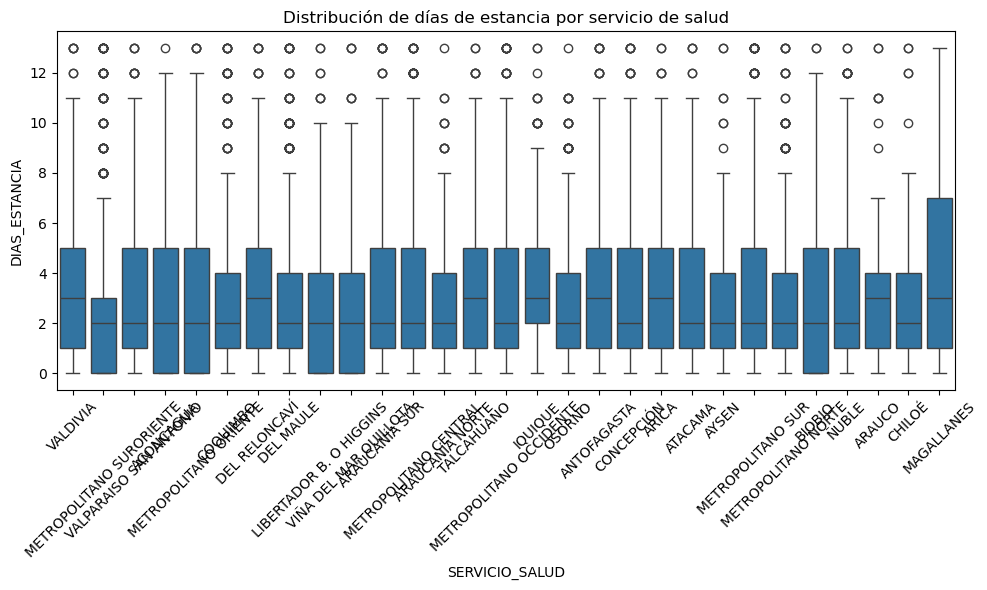

In [24]:
#Visualización
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='SERVICIO_SALUD', y='DIAS_ESTANCIA')
plt.xticks(rotation=45)
plt.title("Distribución de días de estancia por servicio de salud")
plt.tight_layout()
plt.show()

In [25]:
#Peso GRD medio por servicio de salud
peso_por_servicio = df.groupby('SERVICIO_SALUD')['IR_29301_PESO'].mean()
print("Media de peso por servicio:")
print(peso_por_servicio)

Media de peso por servicio:
SERVICIO_SALUD
ACONCAGUA                   0.703591
ANTOFAGASTA                 0.753530
ARAUCANÍA NORTE             0.768903
ARAUCANÍA SUR               0.808296
ARAUCO                      0.780427
ARICA                       0.815384
ATACAMA                     0.814260
AYSEN                       0.828422
BIOBIO                      0.813697
CHILOÉ                      0.804099
CONCEPCIÓN                  0.879198
COQUIMBO                    0.748679
DEL MAULE                   0.817471
DEL RELONCAVÍ               0.837371
IQUIQUE                     0.680740
LIBERTADOR B. O HIGGINS     0.754753
MAGALLANES                  0.916165
METROPOLITANO CENTRAL       0.849227
METROPOLITANO NORTE         0.739119
METROPOLITANO OCCIDENTE     0.840840
METROPOLITANO ORIENTE       0.881131
METROPOLITANO SUR           0.823669
METROPOLITANO SURORIENTE    0.847958
OSORNO                      0.789823
TALCAHUANO                  0.850161
VALDIVIA                    0.86

In [26]:
#Prueba ANOVA para peso media
grupos = [grupo['IR_29301_PESO'].values for _, grupo in df.groupby('SERVICIO_SALUD')]
f_stat, p_valor = f_oneway(*grupos)

print(f"\nANOVA resultados:")
print(f"F = {f_stat:.4f}")
print(f"p-valor = {p_valor:.4f}")

# Interpretación
if p_valor < 0.05:
    print("✅ Hay una diferencia significativa entre al menos dos servicios.")
else:
    print("❌ No se encontraron diferencias significativas entre el peso medio.")


ANOVA resultados:
F = 1.9488
p-valor = 0.0020
✅ Hay una diferencia significativa entre al menos dos servicios.


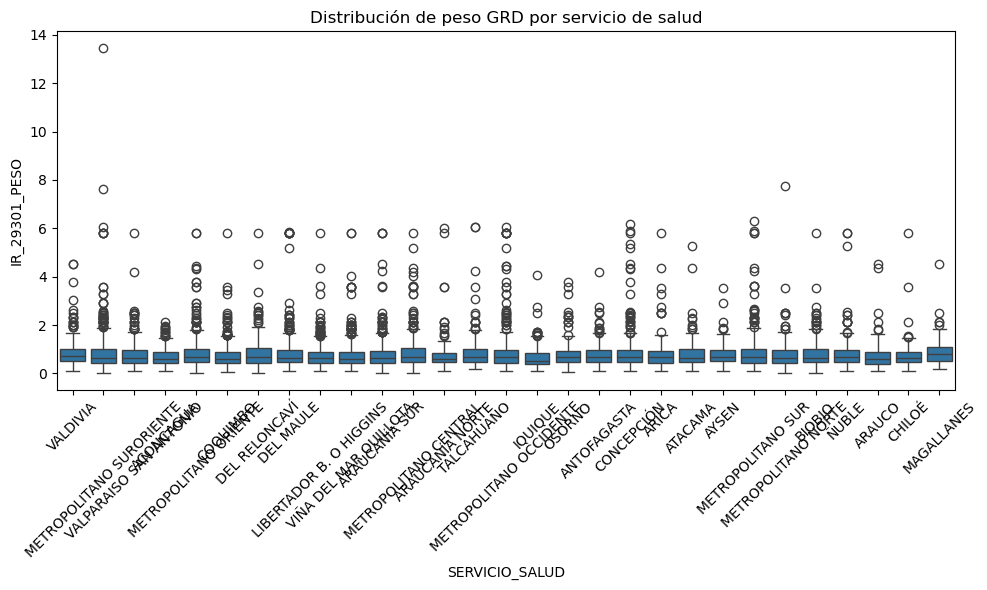

In [27]:
#Visualización
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='SERVICIO_SALUD', y='IR_29301_PESO')
plt.xticks(rotation=45)
plt.title("Distribución de peso GRD por servicio de salud")
plt.tight_layout()
plt.show()

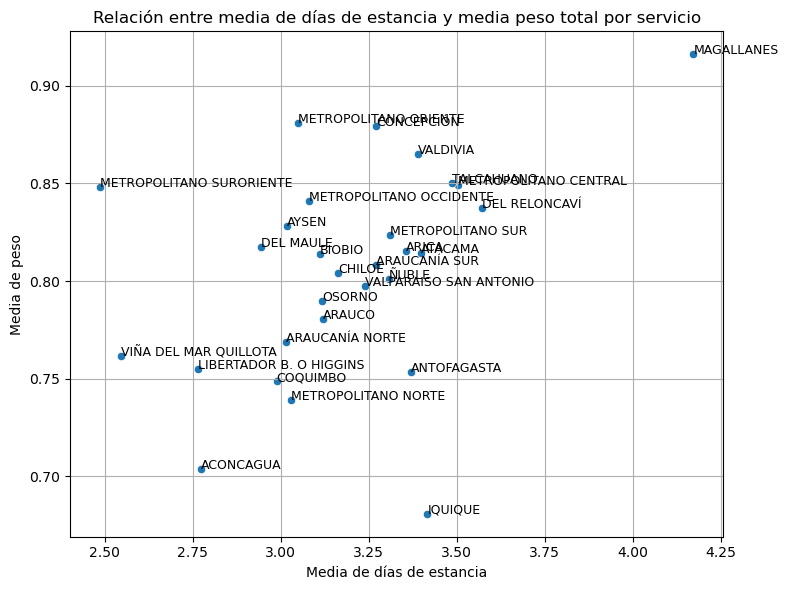

In [28]:
# Calcular medias por grupo
df_medias = df.groupby('SERVICIO_SALUD').agg({
    'DIAS_ESTANCIA': 'mean',
    'IR_29301_PESO': 'mean'
}).reset_index()

df_medias.columns = ['SERVICIO_SALUD', 'Media_Estancia', 'Media_Peso']

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_medias, x='Media_Estancia', y='Media_Peso')

# Añadir etiquetas
for i in range(len(df_medias)):
    plt.text(df_medias['Media_Estancia'][i], df_medias['Media_Peso'][i], 
             df_medias['SERVICIO_SALUD'][i], fontsize=9)

plt.title("Relación entre media de días de estancia y media peso total por servicio")
plt.xlabel("Media de días de estancia")
plt.ylabel("Media de peso")
plt.grid(True)
plt.tight_layout()
plt.show()